# РК №1 Попов М.А. Вариант №13

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from sklearn.datasets import load_boston
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")
import nbconvert

In [89]:
data = pd.read_csv('dataset_software.csv')

In [90]:
data.shape

(2000, 11)

In [91]:
data.head

<bound method NDFrame.head of       Global Flag  Major Flag  SMC Flag  Commercial Flag  IT Spend  \
0               1           0         1                0     45537   
1               0           0         1                1     20842   
2               0           0         0                1     82171   
3               0           0         0                0     30288   
4               0           0         1                0     25930   
...           ...         ...       ...              ...       ...   
1995            0           0         1                1     46186   
1996            0           0         1                0     39683   
1997            0           1         0                0      4195   
1998            1           0         0                1     10664   
1999            0           1         0                1     21618   

      Employee Count  PC Count    Size  Tech Support  Discount       Revenue  
0                 26        26  152205            

### Для студентов группы ИУ5-24М, ИУ5И-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

<AxesSubplot:xlabel='IT Spend'>

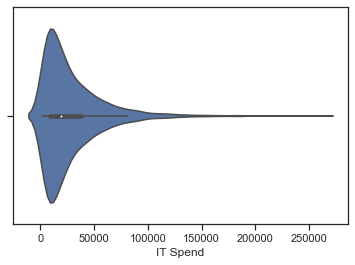

In [92]:
sns.violinplot(x = data['IT Spend'])

## Задача №13. 
### Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "обратная зависимость - 1 / X".

In [93]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [94]:
# Будем использовать только обучающую выборку
data = pd.read_csv('dataset_software.csv', sep=",")

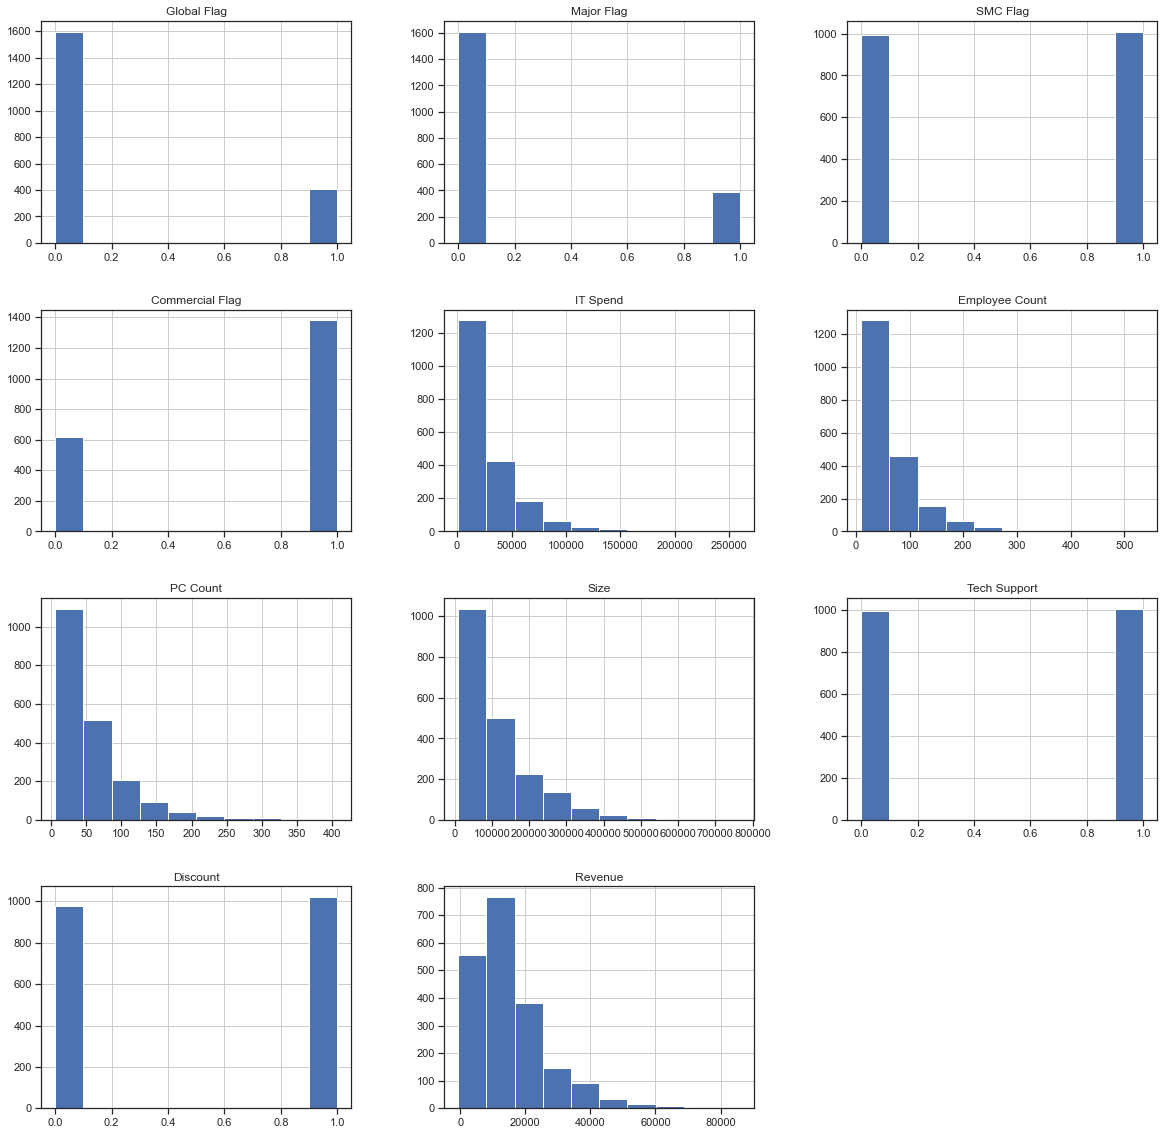

In [95]:
data.hist(figsize=(20,20))
plt.show()

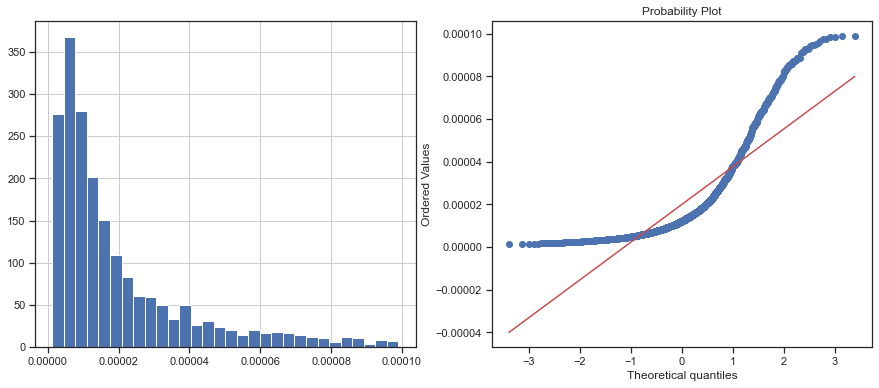

In [96]:
data['Revenue'] = 1 / (data['Size']) 
diagnostic_plots(data, 'Revenue')

# Задача №23.
### Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), алгоритм полного перебора (exhaustive feature selection).

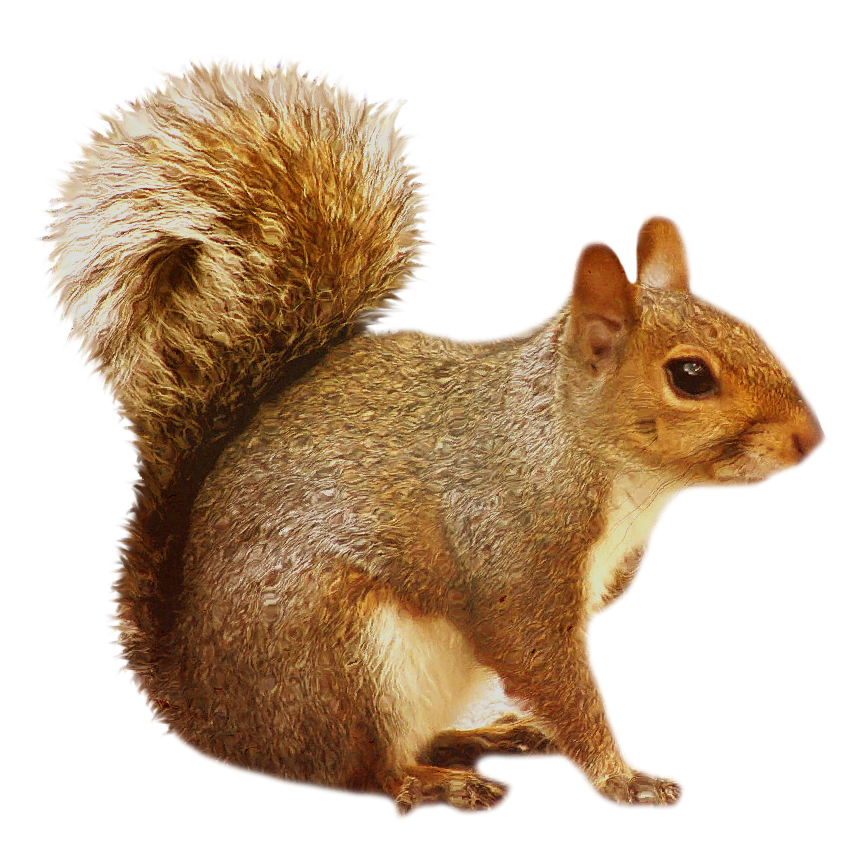

In [97]:
Image('belka.png', width='80%')

In [98]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [99]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [100]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 11/11

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In [101]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 10/10

Best accuracy score: 0.95
Best subset (indices): (2,)
Best subset (corresponding names): ('petal length (cm)',)
